In [11]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", None)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_rows', None)
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

In [12]:
data = pd.read_csv("dataset/SmartHomeDatasetwithweatherInformation/HomeC.csv", low_memory=False)
data = data[:-1] 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503910 entries, 0 to 503909
Data columns (total 32 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   time                 503910 non-null  object 
 1   use [kW]             503910 non-null  float64
 2   gen [kW]             503910 non-null  float64
 3   House overall [kW]   503910 non-null  float64
 4   Dishwasher [kW]      503910 non-null  float64
 5   Furnace 1 [kW]       503910 non-null  float64
 6   Furnace 2 [kW]       503910 non-null  float64
 7   Home office [kW]     503910 non-null  float64
 8   Fridge [kW]          503910 non-null  float64
 9   Wine cellar [kW]     503910 non-null  float64
 10  Garage door [kW]     503910 non-null  float64
 11  Kitchen 12 [kW]      503910 non-null  float64
 12  Kitchen 14 [kW]      503910 non-null  float64
 13  Kitchen 38 [kW]      503910 non-null  float64
 14  Barn [kW]            503910 non-null  float64
 15  Well [kW]        

In [13]:
data.head(2)

,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],Kitchen 12 [kW],Kitchen 14 [kW],Kitchen 38 [kW],Barn [kW],Well [kW],Microwave [kW],Living room [kW],Solar [kW],temperature,icon,humidity,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
0,1451624400,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.12415,0.006983,0.013083,0.000417,0.00015,0.0,0.03135,0.001017,0.004067,0.001517,0.003483,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
1,1451624401,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.12400,0.006983,0.013117,0.000417,0.00015,0.0,0.03150,0.001017,0.004067,0.001650,0.003467,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0


In [14]:
data['time'] = pd.to_datetime(data['time'], unit='s')
data['time'] = pd.DatetimeIndex(pd.date_range('2016-01-01 05:00', periods=len(data),  freq='min'))
data = data.set_index('time')
data.head(2)

,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],Kitchen 12 [kW],Kitchen 14 [kW],Kitchen 38 [kW],Barn [kW],Well [kW],Microwave [kW],Living room [kW],Solar [kW],temperature,icon,humidity,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-01 05:00:00,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.12415,0.006983,0.013083,0.000417,0.00015,0.0,0.03135,0.001017,0.004067,0.001517,0.003483,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
2016-01-01 05:01:00,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.12400,0.006983,0.013117,0.000417,0.00015,0.0,0.03150,0.001017,0.004067,0.001650,0.003467,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0


In [15]:
data["summary"].unique()

array(['Clear', 'Mostly Cloudy', 'Overcast', 'Partly Cloudy', 'Drizzle',
       'Light Rain', 'Rain', 'Light Snow', 'Flurries', 'Breezy', 'Snow',
       'Rain and Breezy', 'Foggy', 'Breezy and Mostly Cloudy',
       'Breezy and Partly Cloudy', 'Flurries and Breezy', 'Dry',
       'Heavy Snow'], dtype=object)

In [16]:
data["cloudCover"].unique()

array(['cloudCover', '0.75', '0', '1', '0.31', '0.44', '0.13', '0.19',
       '0.25', '0.16', '0.21', '0.15', '0.14', '0.27', '0.28', '0.17',
       '0.05', '0.1', '0.26', '0.29', '0.11', '0.09', '0.12', '0.06',
       '0.02', '0.08', '0.04', '0.35', '0.22', '0.23', '0.54', '0.39',
       '0.03', '0.07', '0.76', '0.62', '0.18', '0.79', '0.48', '0.24',
       '0.57', '0.41', '0.78', '0.2', '0.77', '0.46', '0.55', '0.01',
       '0.51', '0.47', '0.5', '0.4', '0.3', '0.43', '0.33', '0.6', '0.68',
       '0.66', '0.45', '0.34', '0.52', '0.67', '0.49', '0.37', '0.36',
       '0.61', '0.38', '0.42', '0.53', '0.63', '0.32', '0.56', '0.58',
       '0.72', '0.73', '0.71', '0.64', '0.59'], dtype=object)

In [17]:
data.columns = [i.replace(' [kW]', '') for i in data.columns]
data['Furnace'] = data[['Furnace 1','Furnace 2']].sum(axis=1)
data['Kitchen'] = data[['Kitchen 12','Kitchen 14','Kitchen 38']].sum(axis=1) #We could also use the mean 
data.drop(['Furnace 1','Furnace 2','Kitchen 12','Kitchen 14','Kitchen 38','icon','summary'], axis=1, inplace=True)

data['cloudCover'].replace(['cloudCover'], method='bfill', inplace=True)
data['cloudCover'] = data['cloudCover'].astype('float')

data = data[['use', 'gen', 'House overall', 'Dishwasher', 'Home office', 'Fridge', 'Wine cellar', 'Garage door', 'Barn',
             'Well', 'Microwave', 'Living room', 'Furnace', 'Kitchen', 'Solar', 'temperature', 'humidity', 'visibility', 
             'apparentTemperature', 'pressure', 'windSpeed', 'cloudCover', 'windBearing', 'precipIntensity', 
             'dewPoint', 'precipProbability']]
data.head(2)

,use,gen,House overall,Dishwasher,Home office,Fridge,Wine cellar,Garage door,Barn,Well,Microwave,Living room,Furnace,Kitchen,Solar,temperature,humidity,visibility,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
time,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-01 05:00:00,0.932833,0.003483,0.932833,0.000033,0.442633,0.12415,0.006983,0.013083,0.03135,0.001017,0.004067,0.001517,0.082617,0.000567,0.003483,36.14,0.62,10.0,29.26,1016.91,9.18,0.75,282.0,0.0,24.4,0.0
2016-01-01 05:01:00,0.934333,0.003467,0.934333,0.000000,0.444067,0.12400,0.006983,0.013117,0.03150,0.001017,0.004067,0.001650,0.084533,0.000567,0.003467,36.14,0.62,10.0,29.26,1016.91,9.18,0.75,282.0,0.0,24.4,0.0


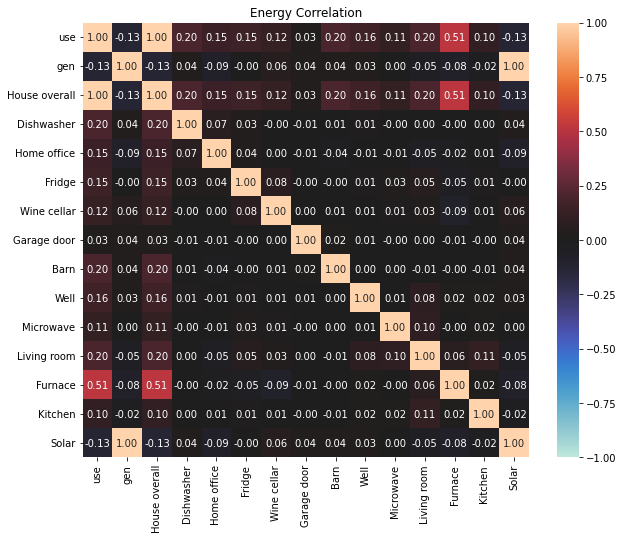

In [18]:
fig = plt.subplots(figsize=(10, 8))
sns.heatmap(data[data.columns[0:15].tolist()].corr(), annot=True, fmt='.2f', vmin=-1.0, vmax=1.0, center=0)
plt.title('Energy Correlation', fontsize=12);

In [19]:
print(data['gen'].equals(data['Solar']))
print(data['use'].equals(data['House overall']))

True
True


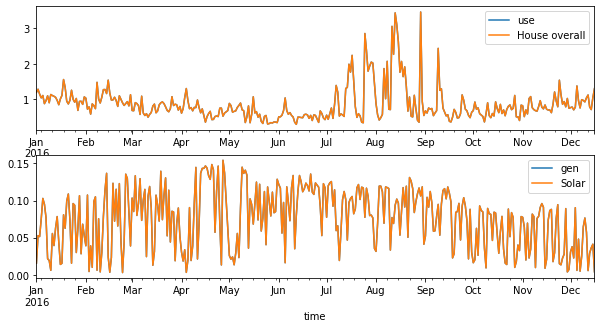

In [22]:
fig, axes = plt.subplots(2,1, figsize=(10,5))
data[['use','House overall']].resample('D').mean().plot(ax=axes[0])
data[['gen','Solar']].resample('D').mean().plot(ax=axes[1]);

In [23]:
data.drop(['use', 'gen'], axis=1, inplace=True)

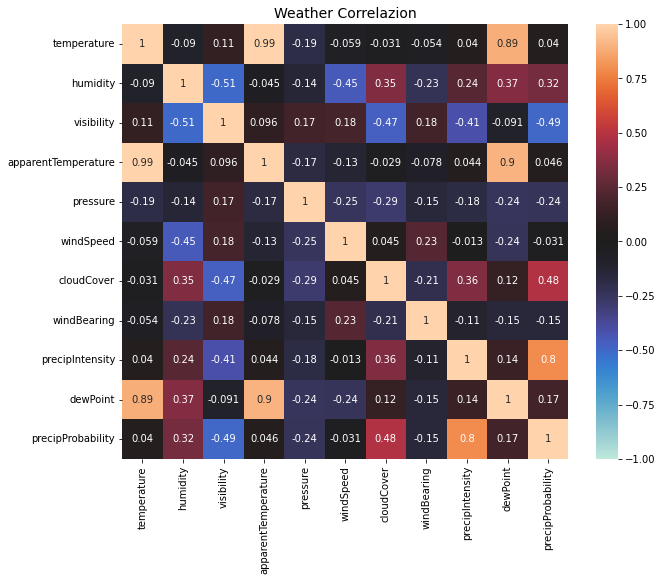

In [24]:
fig = plt.subplots(figsize=(10, 8)) 
sns.heatmap(data[data.columns[13:].tolist()].corr(), annot=True, vmin=-1.0, vmax=1.0, center=0)
plt.title('Weather Correlazion', fontsize=14);

<AxesSubplot:xlabel='time'>

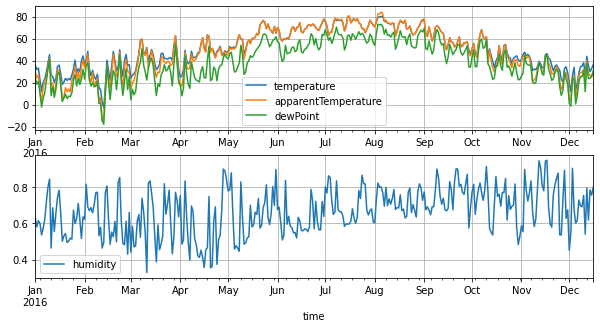

In [25]:
fig, axes = plt.subplots(2,1, figsize=(10,5))
data[['temperature','apparentTemperature', 'dewPoint']].resample('D').mean().plot(ax=axes[0], grid=True)
data[['humidity']].resample('D').mean().plot(ax=axes[1], grid=True)

In [26]:
data['Tdiff'] = (data['apparentTemperature']-data['temperature'])
clima = data.columns[13:-1].tolist()
lista_corr = []
for i in clima:
  cor = data[i].corr(data['Tdiff'])
  lista_corr.append(cor)
data_corr = pd.DataFrame(list(zip(clima, lista_corr)), columns=['weather','Tdiff_corr']).set_index('weather')
data_corr

,Tdiff_corr
weather,
temperature,0.732693
humidity,0.188441
visibility,-0.018984
apparentTemperature,0.807018
pressure,-0.029497
windSpeed,-0.465971
cloudCover,-0.013172
windBearing,-0.180131
precipIntensity,0.055953


<AxesSubplot:xlabel='time'>

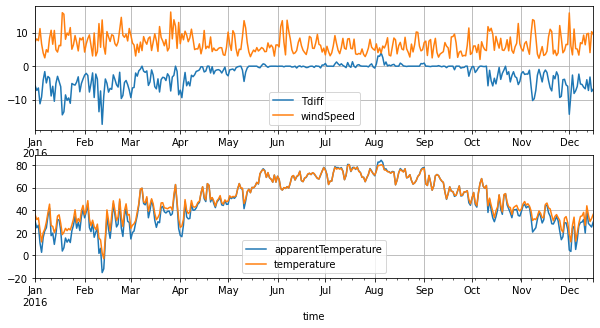

In [27]:
fig, axes = plt.subplots(2,1, figsize=(10,5))
data[['Tdiff','windSpeed']].resample('D').mean().plot(ax=axes[0], grid=True)
data[['apparentTemperature', 'temperature']].resample('D').mean().plot(ax=axes[1], grid=True)

In [28]:
data.drop('Tdiff', axis=1, inplace=True)

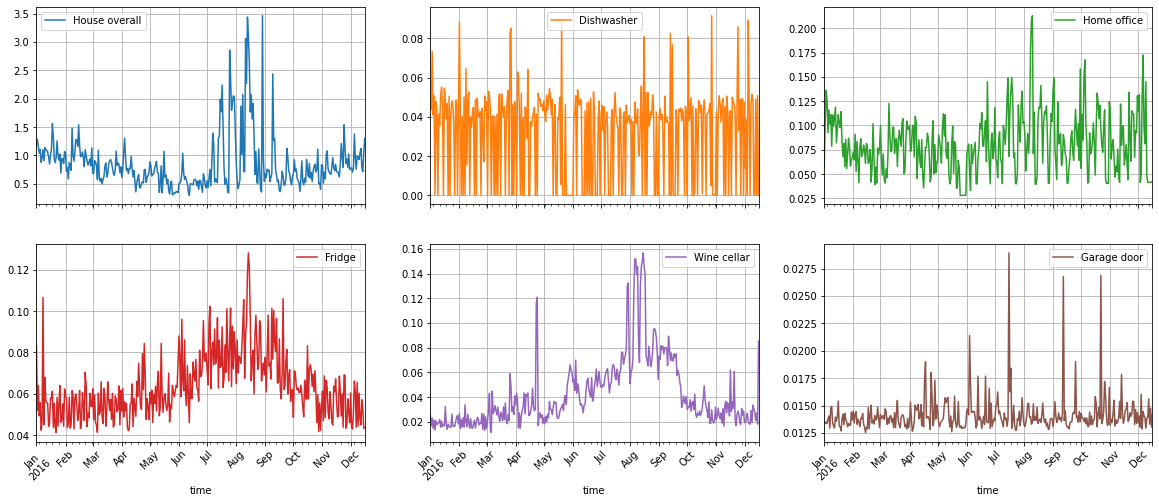

In [29]:
data[data.columns[0:6].tolist()].resample("D").mean().plot(subplots=True, layout=(-1, 3), figsize=(20, 8),
                                                                grid=True, rot=45);

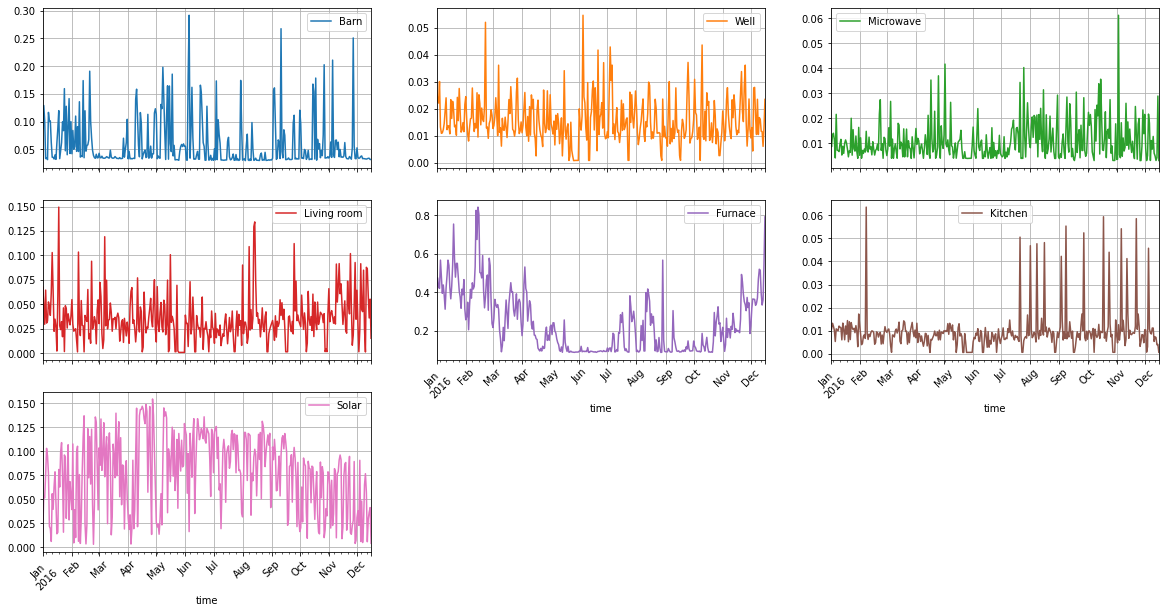

In [30]:
data[data.columns[6:13].tolist()].resample("D").mean().plot(subplots=True, layout=(-1, 3), figsize=(20, 10),
                                                                grid=True, rot=45, xlabel=None);

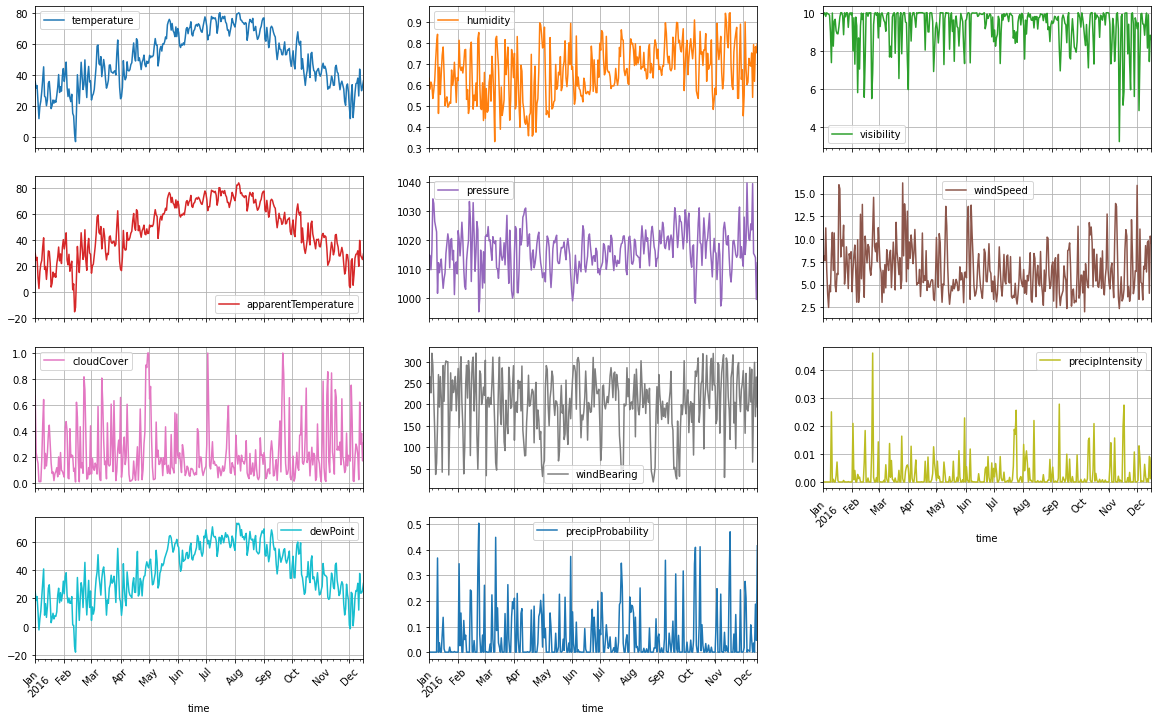

In [31]:
data[data.columns[13:].tolist()].resample("D").mean().plot(subplots=True, layout=(-1, 3), figsize=(20, 12),
                                                                grid=True, rot=45, xlabel=None);

In [32]:
data['month'] = data.index.month
data['day'] = data.index.day
data['weekday'] = data.index.day_name()
data['hour'] = data.index.hour
data['minute'] = data.index.minute
data.head(2)

,House overall,Dishwasher,Home office,Fridge,Wine cellar,Garage door,Barn,Well,Microwave,Living room,Furnace,Kitchen,Solar,temperature,humidity,visibility,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability,month,day,weekday,hour,minute
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-01 05:00:00,0.932833,0.000033,0.442633,0.12415,0.006983,0.013083,0.03135,0.001017,0.004067,0.001517,0.082617,0.000567,0.003483,36.14,0.62,10.0,29.26,1016.91,9.18,0.75,282.0,0.0,24.4,0.0,1,1,Friday,5,0
2016-01-01 05:01:00,0.934333,0.000000,0.444067,0.12400,0.006983,0.013117,0.03150,0.001017,0.004067,0.001650,0.084533,0.000567,0.003467,36.14,0.62,10.0,29.26,1016.91,9.18,0.75,282.0,0.0,24.4,0.0,1,1,Friday,5,1


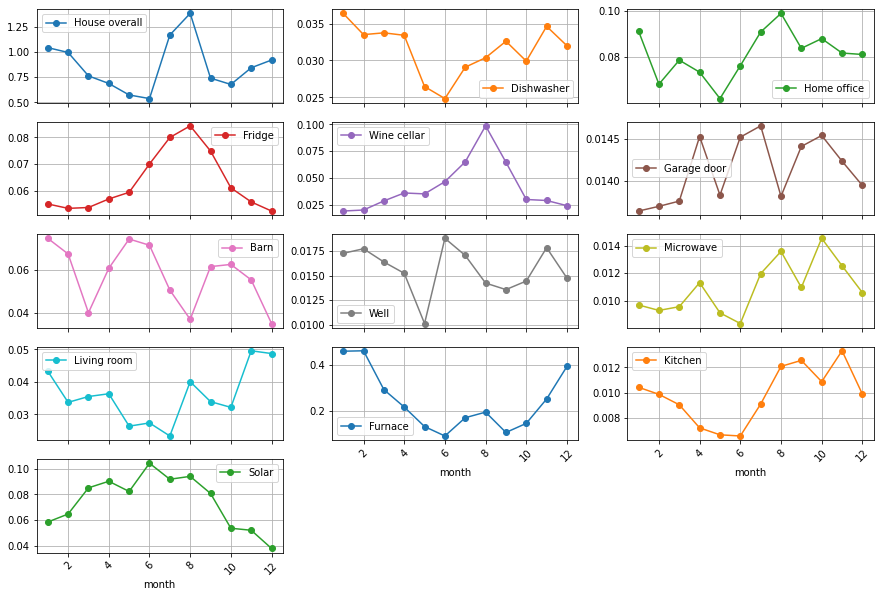

In [33]:
mean_month = data.groupby('month').agg({i:'mean' for i in data.columns[:-5].tolist()})
mean_month[mean_month.columns[0:13].tolist()].plot(subplots=True, layout=(-1, 3), figsize=(15, 10),
                                                       grid=True, rot=45, xlabel=None, marker='o');

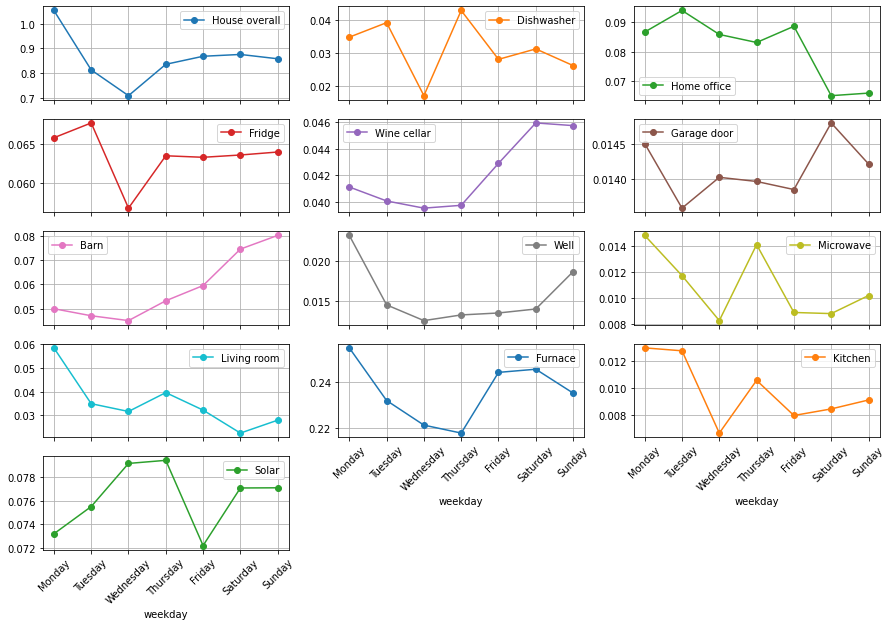

In [34]:
days = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
mean_weekday = data.groupby('weekday').agg({i:'mean' for i in data.columns[:-5].tolist()}).reindex(days)

mean_weekday[mean_weekday.columns[0:13].tolist()].plot(subplots=True, layout=(-1, 3), figsize=(15, 10),
                                                       grid=True, rot=45, xlabel=None, marker='o');

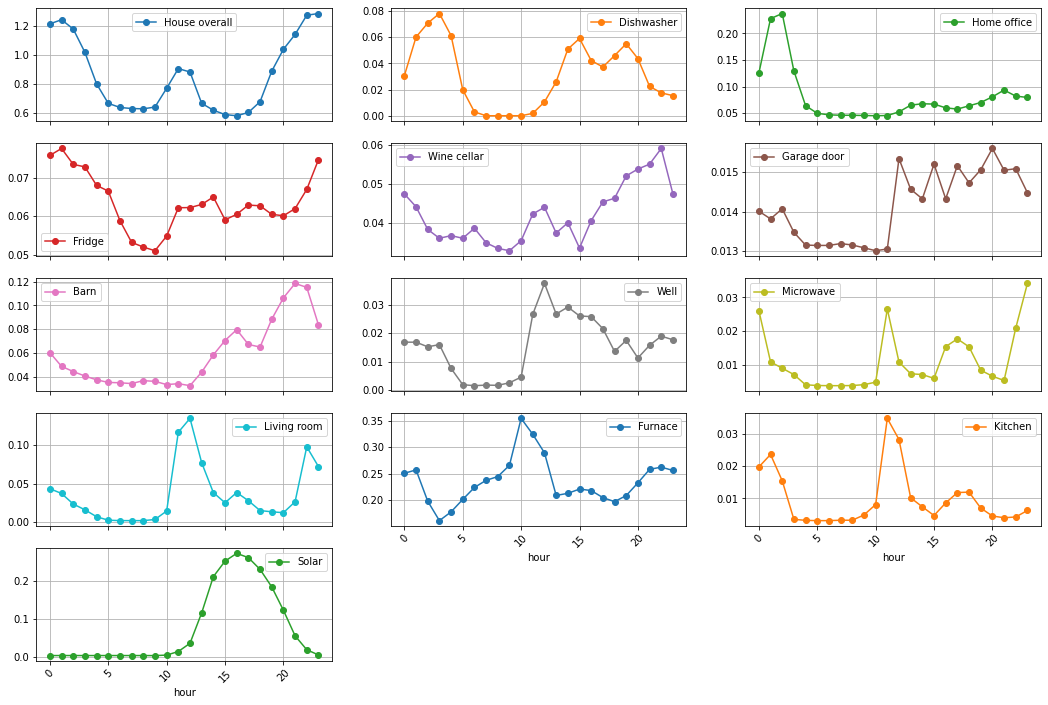

In [35]:
mean_hour = data.groupby('hour').agg({i:'mean' for i in data.columns[:-5].tolist()})

mean_hour[mean_hour.columns[0:13].tolist()].plot(subplots=True, layout=(-1, 3), figsize=(18, 12),
                                                       grid=True, rot=45, xlabel=None, marker='o');

In [36]:
consumtions = data.columns[0:13].tolist()
weather = data.columns[13:-5].tolist()
lists = [consumtions,]
for j in weather:
    correlations = []
    for i in consumtions:
        cor = data[i].corr(data[j])
        correlations.append(cor)
    lists.append(correlations)

names=['consumtions']
for i in weather:
    names.append(i+'_corr')
dataframe_corr = pd.DataFrame(np.column_stack(lists), columns=names).set_index('consumtions')

for i in dataframe_corr.columns[:].tolist():
    dataframe_corr[i] = dataframe_corr[i].apply(float)
dataframe_corr.style.applymap(lambda x: "background-color: red" if x > 0.1 else "background-color: orange" if x < -0.1 else "background-color: white")

,temperature_corr,humidity_corr,visibility_corr,apparentTemperature_corr,pressure_corr,windSpeed_corr,cloudCover_corr,windBearing_corr,precipIntensity_corr,dewPoint_corr,precipProbability_corr
consumtions,,,,,,,,,,,
House overall,0.010379,0.011511,-0.002609,0.005560,0.010730,-0.003853,-0.033460,0.011183,0.024836,0.016040,-0.003317
Dishwasher,-0.015716,-0.001868,-0.008064,-0.014547,0.000211,-0.001672,-0.002395,0.004016,0.006265,-0.016099,0.008189
Home office,0.011908,-0.006008,0.020638,0.010856,0.027091,-0.017898,-0.039897,0.012427,-0.029890,0.007594,-0.032861
Fridge,0.107466,0.030749,0.009019,0.107064,-0.000517,-0.024886,-0.023490,-0.008589,0.014253,0.115169,0.004794
Wine cellar,0.289168,0.055541,0.030095,0.288882,0.018494,-0.052860,-0.040467,-0.025930,0.016588,0.298207,0.006571
Garage door,0.013511,-0.007399,0.002262,0.013578,-0.000276,0.000419,-0.007457,0.012327,-0.006941,0.008350,-0.006639
Barn,-0.017188,-0.002141,0.008376,-0.015189,0.011716,-0.015196,-0.011635,0.006255,-0.007258,-0.016738,-0.006063
Well,-0.004691,-0.006590,-0.001069,-0.004741,0.002994,0.000677,-0.003029,0.004085,-0.004377,-0.007346,-0.002788
Microwave,0.001369,0.012541,-0.018359,0.002265,-0.001248,-0.006129,0.009580,-0.006218,0.026936,0.006286,0.016222


In [37]:
data['Sum_usage'] = data[list(data.columns[1:12])].sum(axis=1)
data['Usage_diff'] = data['House overall'] - data['Sum_usage']
data.head(2)

,House overall,Dishwasher,Home office,Fridge,Wine cellar,Garage door,Barn,Well,Microwave,Living room,Furnace,Kitchen,Solar,temperature,humidity,visibility,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability,month,day,weekday,hour,minute,Sum_usage,Usage_diff
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-01 05:00:00,0.932833,0.000033,0.442633,0.12415,0.006983,0.013083,0.03135,0.001017,0.004067,0.001517,0.082617,0.000567,0.003483,36.14,0.62,10.0,29.26,1016.91,9.18,0.75,282.0,0.0,24.4,0.0,1,1,Friday,5,0,0.708017,0.224817
2016-01-01 05:01:00,0.934333,0.000000,0.444067,0.12400,0.006983,0.013117,0.03150,0.001017,0.004067,0.001650,0.084533,0.000567,0.003467,36.14,0.62,10.0,29.26,1016.91,9.18,0.75,282.0,0.0,24.4,0.0,1,1,Friday,5,1,0.711500,0.222833


<AxesSubplot:xlabel='time'>

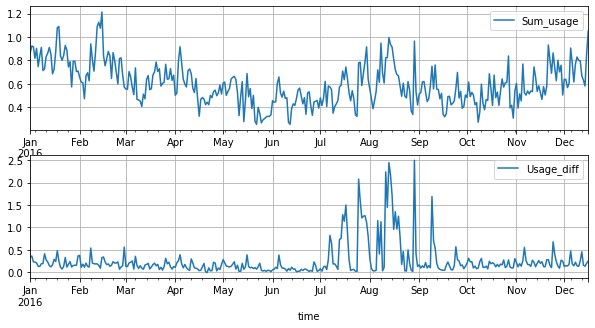

In [38]:
fig, axes = plt.subplots(2,1, figsize=(10,5))
data['Sum_usage'].resample('D').mean().plot(ax=axes[0], grid=True, legend=True)
data['Usage_diff'].resample('D').mean().plot(ax=axes[1], grid=True, legend=True)

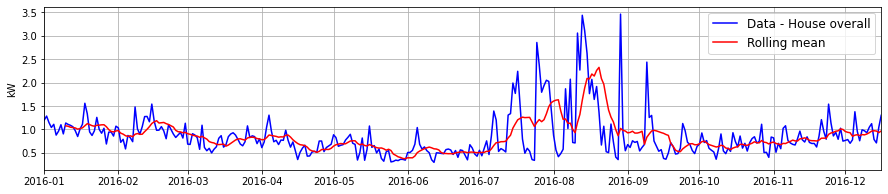

In [39]:
data_daily = data['House overall'].resample('d').mean()
baseline = data_daily.rolling(window=10).mean()
plt.figure(figsize=(15,3))
plt.plot(data_daily, c='blue',label='Data - House overall')
plt.plot(baseline, c='red', label='Rolling mean')
plt.legend(fontsize=12)
plt.ylabel('kW')
plt.margins(x=0)
plt.grid()

MSE: 0.071
RMSE: 0.266
MAE: 0.177
MAPE: 0.236
MASE: 0.721
R^2 score: 0.077
R^2 manual: 0.0767596381423179


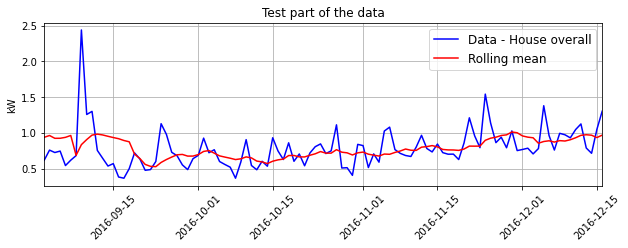

In [40]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

#Split time series and take the last 30% of it, like if it was the test part of the model
size = int(len(data_daily)*0.7)
train = data_daily[:size]
test = data_daily[size:]
#take moving average for this portion of the data
baseline_test = baseline.loc[test.index[0]:]
#Plot
plt.figure(figsize=(10,3))
plt.plot(test, c='blue',label='Data - House overall')
plt.plot(baseline_test, c='red', label='Rolling mean')
plt.legend(fontsize=12)
plt.ylabel('kW')
plt.margins(x=0)
plt.title('Test part of the data'), plt.grid(), plt.xticks(rotation=45);

# calculate error
print('MSE: %.3f' % (mean_squared_error(test, baseline_test)))
print('RMSE: %.3f' % np.sqrt(mean_squared_error(test, baseline_test)))
MAE = mean_absolute_error(test, baseline_test)
MAPE = np.mean(np.abs(baseline_test - test)/np.abs(test))
MASE = np.mean(np.abs(test - baseline_test))/(np.abs(np.diff(train)).sum()/(len(train)-1))
print('MAE: %.3f' % MAE)
print('MAPE: %.3f' %MAPE)
print('MASE: %.3f' %MASE)
print('R^2 score: %.3f' % r2_score(test, baseline_test))

print('R^2 manual:', 1-(sum((baseline_test-test)**2)/sum((np.mean(test)-test)**2)))

RMSE: 0.304
MAE: 0.194
MAPE: 0.233
MASE: 0.790
R^2 score: -0.203


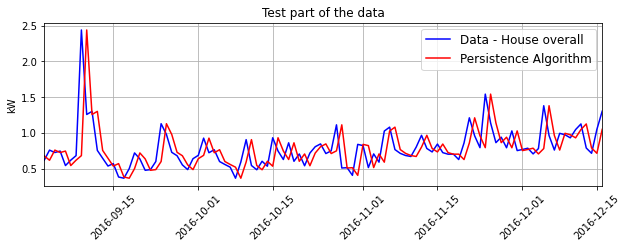

In [41]:
baseline = data_daily.shift(1)
baseline = baseline.dropna()
data_actual = data_daily.iloc[1:]
size = int(len(data_actual)*0.7)
train = data_daily[:size]
test = data_actual[size:]
baseline_test = baseline.loc[test.index[0]:]

plt.figure(figsize=(10,3))
plt.plot(test, c='blue',label='Data - House overall')
plt.plot(baseline_test, c='red', label='Persistence Algorithm')
plt.legend(fontsize=12)
plt.ylabel('kW')
plt.margins(x=0)
plt.title('Test part of the data'), plt.grid(), plt.xticks(rotation=45);
print('RMSE: %.3f' % np.sqrt(mean_squared_error(test, baseline_test)))
MAE = mean_absolute_error(test, baseline_test)
MAPE = np.mean(np.abs(baseline_test - test)/np.abs(test))
MASE = np.mean(np.abs(test - baseline_test ))/(np.abs(np.diff(train)).sum()/(len(train)-1))
print('MAE: %.3f' % MAE)
print('MAPE: %.3f' %MAPE)
print('MASE: %.3f' %MASE)
print('R^2 score: %.3f' % r2_score(test, baseline_test))

DICK-FULLER RESULTS: 

Test Statistic                  -2.988003
p-value                          0.036030
#Lags Used                      10.000000
Number of Observations Used    340.000000
Critical Value (1%)             -3.449730
Critical Value (5%)             -2.870079
Critical Value (10%)            -2.571319
dtype: float64


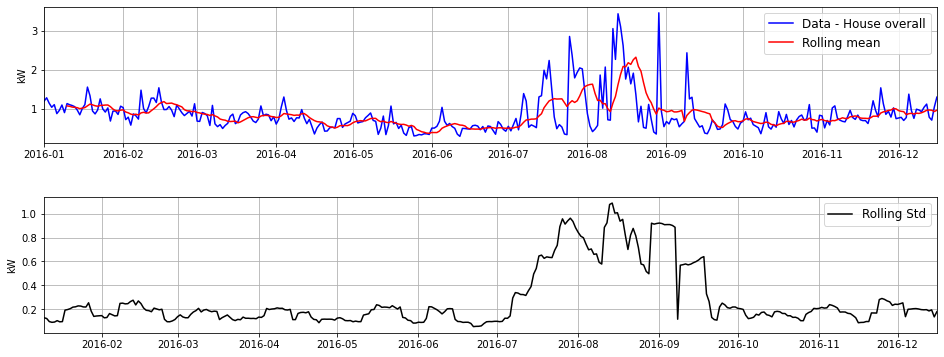

In [42]:
data_daily = data['House overall'].resample('d').mean()
rollingMEAN = data_daily.rolling(window=10).mean()
rollingSTD = data_daily.rolling(window=10).std()
#Plot
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(16,6))
plt.subplots_adjust(hspace=0.4)
ax1.plot(data_daily, c='blue',label='Data - House overall')
ax1.plot(rollingMEAN, c='red', label='Rolling mean')
ax2.plot(rollingSTD, c='black',label = 'Rolling Std')

ax1.legend(fontsize=12), ax2.legend(fontsize=12)
ax1.set_ylabel('kW'), ax2.set_ylabel('kW')
ax1.margins(x=0), ax2.margins(x=0)
ax1.grid(), ax2.grid()
(None, None)

from statsmodels.tsa.stattools import adfuller

resultDFtest = adfuller(data_daily, autolag='AIC')
Out = pd.Series(resultDFtest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key1, value1 in resultDFtest[4].items():
    Out['Critical Value (%s)'%key1] = value1
    
print('DICK-FULLER RESULTS: \n\n{}'.format(Out))

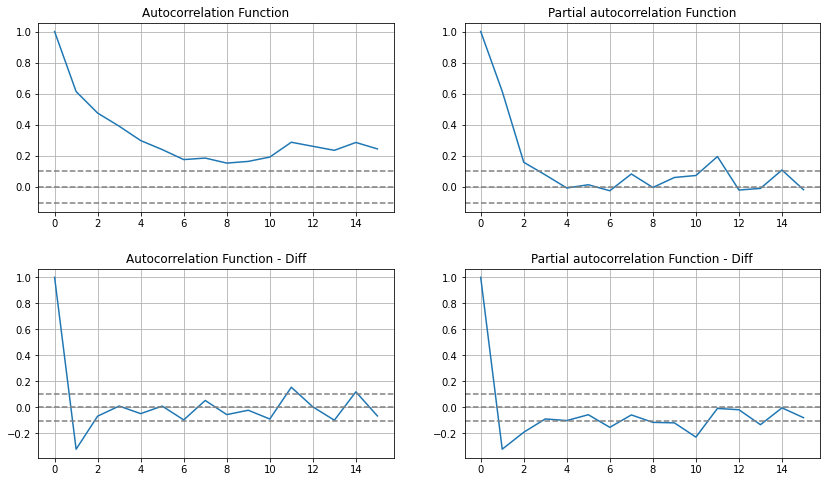

In [43]:
data_daily_diff = data_daily-data_daily.shift(1)
data_daily_diff = data_daily_diff.dropna()

#AUTOCORRELATION FUNCTION AND PARTIAL AUTOCORRELATION FUNCTION PLOTS
from statsmodels.graphics.tsaplots import acf, pacf
ACF = acf(data_daily, nlags=15)
PACF = pacf(data_daily, nlags=15, method='ols') #ols - ordinary least squared
ACF1 = acf(data_daily_diff, nlags=15)
PACF1 = pacf(data_daily_diff, nlags=15, method='ols') #ols - ordinary least squared

def plots_corr(ax,func,dat,title):
    ax.plot(func)
    ax.axhline(y=0, linestyle='--',c='gray')
    ax.axhline(y=-1.96/np.sqrt(len(dat)),linestyle='--',c='gray')
    ax.axhline(y=1.96/np.sqrt(len(dat)),linestyle='--',c='gray')
    ax.grid()
    ax.set_title(title)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(14,8))
plt.subplots_adjust(hspace=0.3)
plots_corr(ax1, ACF, data_daily,'Autocorrelation Function')
plots_corr(ax2, PACF, data_daily,'Partial autocorrelation Function')
plots_corr(ax3, ACF1, data_daily_diff,'Autocorrelation Function - Diff')
plots_corr(ax4, PACF1, data_daily_diff,'Partial autocorrelation Function - Diff')

In [44]:
size = int(len(data_daily)*0.7)
train = data_daily[:size]
test = data_daily[size:]
print('Number of points in series:', len(data_daily))
print('Number of points in train:', len(train))
print('Number of points in test:', len(test))

Number of points in series: 351
Number of points in train: 245
Number of points in test: 106


NameError: name 'model_fit' is not defined

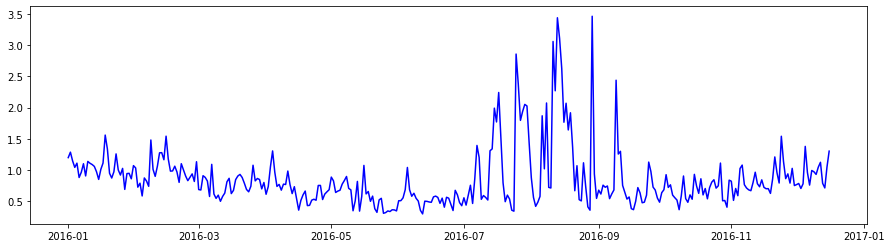

In [46]:
plt.figure(figsize=(15,4))
plt.plot(data_daily, c='blue',label='Data - House overall')
plt.plot(model_fit.predict(dynamic=False), c='red', label='model')
plt.legend()
plt.grid(), plt.margins(x=0);
print(model_fit.summary())